# Basemap
---
## Basemap 설치

1. https://blog.naver.com/dsz08082/221231703429 참고

2. https://www.lfd.uci.edu/~gohlke/pythonlibs/ 에서 아래 파일 다운로드

    - pyproj-1.9.5.1-cp36-cp36m-win_amd64.whl
    - pyshp-2.0.0-py2.py3-none-any.whl
    - basemap-1.2.0-cp36-cp36m-win_amd64.whl

3. 아나콘다 콘솔에서 다음 실행

    - pip install pyproj-1.9.5.1-cp36-cp36m-win_amd64.whl
    - pip install pyshp-2.0.0-py2.py3-none-any.whl
    - pip install basemap-1.2.0-cp36-cp36m-win_amd64.whl

4. ipython 실행

    - import mpl_toolkits.basemap as basemap

In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib


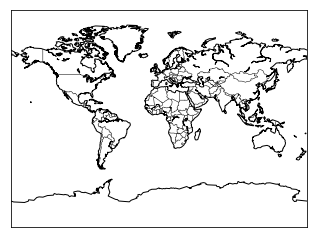

In [3]:
m = Basemap(projection='mill')
m.drawcoastlines()
m.drawcountries()
plt.show()

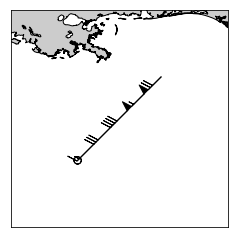

In [5]:
lats = np.arange(26, 29, 0.5)
lons = np.arange(-90, -87, 0.5)

m = Basemap(projection='cyl', llcrnrlon=min(lons)-2, llcrnrlat=min(lats)-2,
            urcrnrlon=max(lons)+2, urcrnrlat=max(lats)+2, resolution='h')

x, y = m(lons,lats)
u, v = np.arange(0, 51, 10), np.arange(0, 51, 10)
barbs = m.barbs(x, y, u, v)

m.drawcoastlines()
m.fillcontinents()

# x_size, y_size = 0.8, 0.4
# x0, y0 = m(x[-1] - x_size/2., y[-1] - y_size/2.)
# x1, y1 = m(x[-1] + x_size/2., y[-1] + y_size/2.)
# im = plt.imshow(plt.imread('mslr86.png'), extent=(x0, x1, y0, y1))

plt.show()

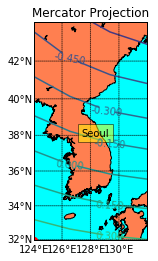

In [7]:
m = Basemap(llcrnrlon=124, llcrnrlat=32, urcrnrlon=132, urcrnrlat = 44, projection='merc', lat_ts=37, resolution='i')

m.bluemarble()
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')

m.drawparallels(np.arange(32., 44., 2.), labels=[1,0,0,0])
m.drawmeridians(np.arange(124., 132., 2.), labels=[0,0,0,1])
m.drawmapboundary(fill_color='aqua')

nlats = 37
nlons = 129

delta = 2*np.pi/(nlons-1)

lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])

wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.) # compute native map projection coordinates of lat/lon grid.

x, y = m(lons*180./np.pi, lats*180./np.pi) # contour data over the map.

CS = m.contour(x,y,wave+mean,15,linewidths=1.5)
m.plot(129,37,'ro')

plt.clabel(CS)
plt.text(300000, 650000, "Seoul", bbox=dict(facecolor='yellow', alpha=0.5))
plt.title("Mercator Projection")

plt.show()